# Bonus (Optional)

In [1]:
# Use a different set of time-based data. 
# Import your data and use describe to calculate the basic descriptive statistics for your data set.
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
covid = pd.read_csv('C:/Users/mandi/OneDrive/Documents/NWMSU/44-608/608-mod7/us-states.csv')
print(covid.head())

covid_mo = covid[covid['state'] == 'Missouri']
covid_mo.columns = ['Date', 'State', 'FIPS', 'Cases', 'Deaths']
print(covid_mo.head())

print("Data type Date: ", covid_mo.Date.dtype)
print("Data type Cases: ", covid_mo.Cases.dtype)

# convert date to int
covid_mo['Date_Date']= pd.to_datetime(covid_mo['Date'])
covid_mo['Year'] = covid_mo['Date_Date'].dt.year.astype(int)
covid_mo['Month'] = covid_mo['Date_Date'].dt.month.astype(int)
covid_mo['Day'] = covid_mo['Date_Date'].dt.day.astype(int)
covid_mo['Year_Month_Format'] = covid_mo['Date'].str[:7]
covid_mo['Year_Month_Int'] = covid_mo['Year_Month_Format'].replace('-', '', regex=True).astype(int)

# limit to 2021 data
covid_mo = covid_mo[covid_mo['Year_Month_Int'] >= 202101]
covid_mo = covid_mo[covid_mo['Year_Month_Int'] <= 202112]

# limit to 1st day of each month
covid_mo = covid_mo[covid_mo['Day'] == 1]

# find days elapsed in month/year
covid_mo['Day_count'] = covid_mo['Date_Date'].dt.daysinmonth.astype(int)
covid_mo.info()
covid_mo

covid_mo2 = covid_mo[['Year', 'Year_Month_Int', 'Year_Month_Format', 'Month', 'State', 'Cases', 'Day_count']]
#covid_mo2 = pd.pivot_table(covid_mo2, values=['Cases'], index=['Year', 'Year_Month_Int', 'Year_Month_Format', 'Day_count', 'State'], aggfunc=np.sum)
#covid_mo2 = covid_mo2.reset_index()
covid_mo2

         date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
           Date     State  FIPS  Cases  Deaths
364  2020-03-07  Missouri    29      1       0
399  2020-03-08  Missouri    29      1       0
435  2020-03-09  Missouri    29      1       0
473  2020-03-10  Missouri    29      1       0
515  2020-03-11  Missouri    29      1       0
Data type Date:  object
Data type Cases:  int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 16760 to 35201
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               12 non-null     object        
 1   State              12 non-null     object        
 2   FIPS               12 non-null     int64         
 3 

,Year,Year_Month_Int,Year_Month_Format,Month,State,Cases,Day_count
16760,2021,202101,2021-01,1,Missouri,421217,31
18465,2021,202102,2021-02,2,Missouri,501226,28
20005,2021,202103,2021-03,3,Missouri,525206,31
21710,2021,202104,2021-04,4,Missouri,589546,30
23360,2021,202105,2021-05,5,Missouri,601861,31
25065,2021,202106,2021-06,6,Missouri,615552,30
26715,2021,202107,2021-07,7,Missouri,636120,31
28420,2021,202108,2021-08,8,Missouri,697481,31
30125,2021,202109,2021-09,9,Missouri,777724,30
31785,2021,202110,2021-10,10,Missouri,838961,31


In [2]:
# Use describe to calculate basic descriptive statistics for the dataset. 
pd.set_option('precision', 2)
covid_mo2.describe()

,Year,Year_Month_Int,Month,Cases,Day_count
count,12.0,12.00,12.00,12.00,12.00
mean,2021.0,202106.50,6.50,666926.42,30.42
std,0.0,3.61,3.61,157752.68,0.90
min,2021.0,202101.00,1.00,421217.00,28.00
25%,2021.0,202103.75,3.75,573461.00,30.00
50%,2021.0,202106.50,6.50,625836.00,31.00
75%,2021.0,202109.25,9.25,793033.25,31.00
max,2021.0,202112.00,12.00,925527.00,31.00


In [3]:
# Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
from scipy import stats 

linear_regression = stats.linregress(x=covid_mo2.Month, y=covid_mo2.Cases)

print("Slope:", linear_regression.slope)
print("Intercept:", linear_regression.intercept)

Slope: 43130.22027972028
Intercept: 386579.9848484848


In [4]:
# Use your project to predict a point in the future.
jan_2022 = linear_regression.slope * 13 + linear_regression.intercept
feb_2022 = linear_regression.slope * 14 + linear_regression.intercept
mar_2022 = linear_regression.slope * 15 + linear_regression.intercept
print("Covid Case Prediction for Jan 2022:", jan_2022 )
print("Covid Case Prediction for Feb 2022:", feb_2022 )
print("Covid Case Prediction for Mar 2022:", mar_2022 )

Covid Case Prediction for Jan 2022: 947272.8484848484
Covid Case Prediction for Feb 2022: 990403.0687645688
Covid Case Prediction for Mar 2022: 1033533.2890442889


[Text(0.5, 1.0, '2021 Covid Cases by Month')]

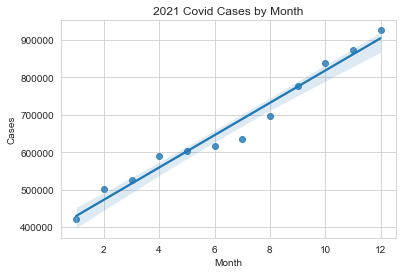

In [5]:
# Chart the data with the best-fit line.
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=covid_mo2.Month, y=covid_mo2.Cases)
axes.set(title="2021 Covid Cases by Month")

In [6]:
# Display a screenshot showing your chart with the best-fit line and the predicted point in the future.  
covid_mo3 = pd.DataFrame(covid_mo2)

dict = {'Year':[2022, 2022, 2022],
        'Year_Month_Int':[202201, 202202, 202203],
        'Year_Month_Format':['2022-01', '2022-02', '2022-03'],
        'State':['Missouri', 'Missouri', 'Missouri'],
        'Cases':[jan_2022, feb_2022, mar_2022],
        'Day_count':[31, 28, 31],
        'Month':[13, 14, 15]
       }
df2 = pd.DataFrame(dict)

covid_mo3 = pd.concat([covid_mo3, df2], ignore_index = True)
covid_mo3.reset_index()
display(covid_mo3)


,Year,Year_Month_Int,Year_Month_Format,Month,State,Cases,Day_count
0,2021,202101,2021-01,1,Missouri,4.21e+05,31
1,2021,202102,2021-02,2,Missouri,5.01e+05,28
2,2021,202103,2021-03,3,Missouri,5.25e+05,31
3,2021,202104,2021-04,4,Missouri,5.90e+05,30
4,2021,202105,2021-05,5,Missouri,6.02e+05,31
5,2021,202106,2021-06,6,Missouri,6.16e+05,30
6,2021,202107,2021-07,7,Missouri,6.36e+05,31
7,2021,202108,2021-08,8,Missouri,6.97e+05,31
8,2021,202109,2021-09,9,Missouri,7.78e+05,30
9,2021,202110,2021-10,10,Missouri,8.39e+05,31


(1.0, 15.0)

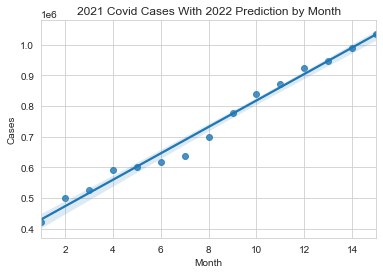

In [8]:
# Chart the data with the best-fit line.
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure()
#plt.xlim(1, 12)

sns.set_style('whitegrid')
axes = sns.regplot(x=covid_mo3.Month, y=covid_mo3.Cases)
axes.set(title="2021 Covid Cases With 2022 Prediction by Month")
axes.set_xlim(1,15)

In [ ]:
# amanda hanway